In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np, cv2 as cv

In [2]:
train_path = '/kaggle/input/vegetables/vegetable/train'
val_path = '/kaggle/input/vegetables/vegetable/validation'

train_ds = tf.keras.utils.image_dataset_from_directory(train_path)
val_ds = tf.keras.utils.image_dataset_from_directory(val_path)

Found 2 files belonging to 2 classes.
Found 2 files belonging to 2 classes.


In [3]:
vege_names = train_ds.class_names

In [4]:
vege_names

['bean', 'tomato']

In [5]:
model = Sequential()

In [6]:
model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(vege_names)))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0

In [8]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


Cleanup called...


1/1 [==============================] - 1s 1s/step - loss: 0.7171 - accuracy: 0.0000e+00 - val_loss: 0.5980 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.5000

Cleanup called...
Cleanup called...
Cleanup called...


1/1 [==============================] - 0s 93ms/step - loss: 0.5980 - accuracy: 0.5000 - val_loss: 0.1683 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 91ms/step - loss: 0.1683 - accuracy: 1.0000 - val_loss: 0.1871 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 0.1871 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


1/1 [==============================] - 0s 95ms/step - loss: 0.1871 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 95ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/1 [==============================] - 0s 97ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 96ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/1 [==============================] - 0s 94ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 94ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


1/1 [==============================] - 0s 100ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000


Cleanup called...


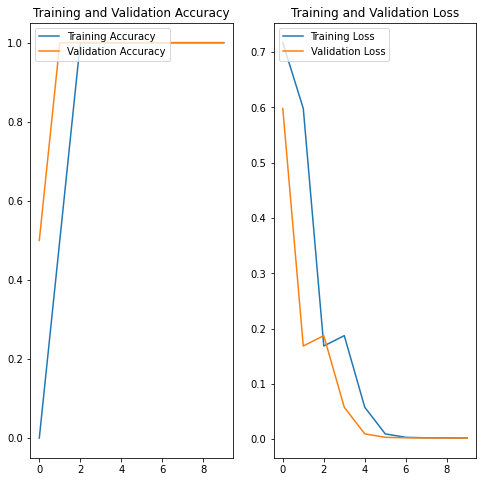

In [9]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

This image most likely belongs to bean with a 100.00 percent confidence.


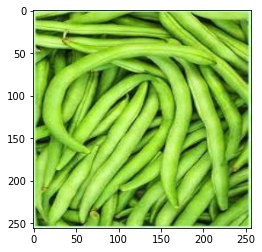

In [10]:
test_path = '/kaggle/input/vegetables/vegetable/test/bean/bean.jpg'

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vege_names[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()